In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
dataset = sklearn.datasets.load_breast_cancer()

In [4]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [6]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df['label'] = dataset.target

In [8]:
df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
df.shape

(569, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
df.duplicated().sum()

0

In [14]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

0 --> Malignant

1 --> Benign

In [15]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


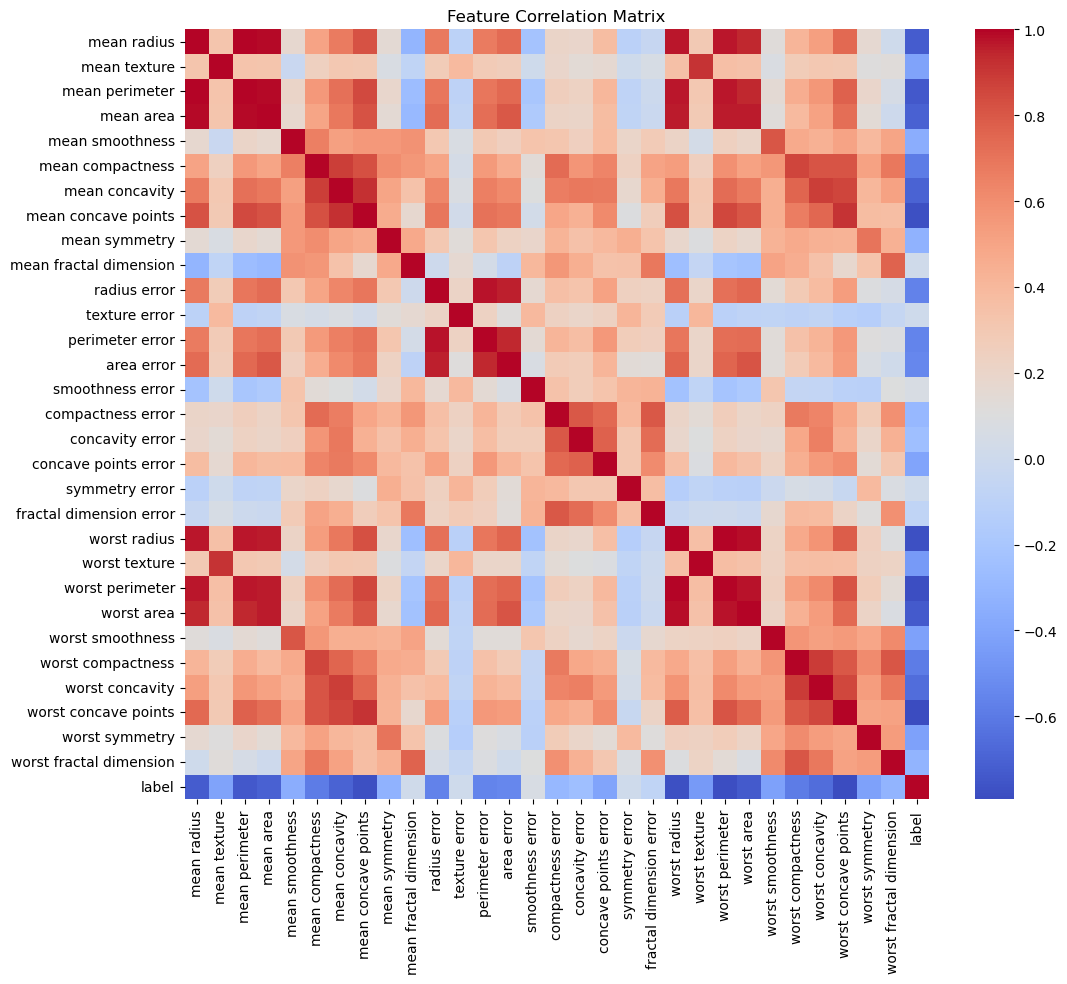

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [17]:
X = df.drop(columns='label', axis=1)
y = df['label']

In [18]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
print(X.shape ,X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


### Feature Engineering - Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Fit random forest to get feature importances
rf = RandomForestClassifier(random_state=42)

In [24]:
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [25]:
# Sort features by importance
importances = pd.Series(rf.feature_importances_, index=X.columns)

In [57]:
important_features = importances.sort_values(ascending=False).head(12).index.tolist()
important_features

['worst area',
 'worst concave points',
 'mean concave points',
 'worst radius',
 'worst perimeter',
 'mean perimeter',
 'mean concavity',
 'mean area',
 'worst concavity',
 'mean radius',
 'area error',
 'worst compactness']

In [58]:
new_df = df[important_features + ['label']]
new_df

,worst area,worst concave points,mean concave points,worst radius,worst perimeter,mean perimeter,mean concavity,mean area,worst concavity,mean radius,area error,worst compactness,label
0,2019.0,0.2654,0.14710,25.380,184.60,122.80,0.30010,1001.0,0.7119,17.99,153.40,0.66560,0
1,1956.0,0.1860,0.07017,24.990,158.80,132.90,0.08690,1326.0,0.2416,20.57,74.08,0.18660,0
2,1709.0,0.2430,0.12790,23.570,152.50,130.00,0.19740,1203.0,0.4504,19.69,94.03,0.42450,0
3,567.7,0.2575,0.10520,14.910,98.87,77.58,0.24140,386.1,0.6869,11.42,27.23,0.86630,0
4,1575.0,0.1625,0.10430,22.540,152.20,135.10,0.19800,1297.0,0.4000,20.29,94.44,0.20500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2027.0,0.2216,0.13890,25.450,166.10,142.00,0.24390,1479.0,0.4107,21.56,158.70,0.21130,0
565,1731.0,0.1628,0.09791,23.690,155.00,131.20,0.14400,1261.0,0.3215,20.13,99.04,0.19220,0
566,1124.0,0.1418,0.05302,18.980,126.70,108.30,0.09251,858.1,0.3403,16.60,48.55,0.30940,0
567,1821.0,0.2650,0.15200,25.740,184.60,140.10,0.35140,1265.0,0.9387,20.60,86.22,0.86810,0


In [59]:
new_df.head(5)

,worst area,worst concave points,mean concave points,worst radius,worst perimeter,mean perimeter,mean concavity,mean area,worst concavity,mean radius,area error,worst compactness,label
0,2019.0,0.2654,0.14710,25.38,184.60,122.80,0.3001,1001.0,0.7119,17.99,153.40,0.6656,0
1,1956.0,0.1860,0.07017,24.99,158.80,132.90,0.0869,1326.0,0.2416,20.57,74.08,0.1866,0
2,1709.0,0.2430,0.12790,23.57,152.50,130.00,0.1974,1203.0,0.4504,19.69,94.03,0.4245,0
3,567.7,0.2575,0.10520,14.91,98.87,77.58,0.2414,386.1,0.6869,11.42,27.23,0.8663,0
4,1575.0,0.1625,0.10430,22.54,152.20,135.10,0.1980,1297.0,0.4000,20.29,94.44,0.2050,0


In [60]:
new_df.tail(10)

,worst area,worst concave points,mean concave points,worst radius,worst perimeter,mean perimeter,mean concavity,mean area,worst concavity,mean radius,area error,worst compactness,label
559,474.2,0.09653,0.04105,12.480,82.28,74.52,0.11120,403.5,0.3630,11.51,16.97,0.25170,1
560,706.7,0.10480,0.04304,15.300,100.20,91.38,0.04462,600.4,0.1326,14.05,29.84,0.22640,1
561,439.6,0.00000,0.00000,11.920,75.19,70.67,0.00000,386.0,0.0000,11.20,22.81,0.05494,1
562,915.0,0.23560,0.09429,17.520,128.70,103.40,0.25500,716.9,1.1700,15.22,22.65,0.79170,0
563,1819.0,0.25420,0.14740,24.290,179.10,143.00,0.31740,1347.0,0.6599,20.92,118.80,0.41860,0
564,2027.0,0.22160,0.13890,25.450,166.10,142.00,0.24390,1479.0,0.4107,21.56,158.70,0.21130,0
565,1731.0,0.16280,0.09791,23.690,155.00,131.20,0.14400,1261.0,0.3215,20.13,99.04,0.19220,0
566,1124.0,0.14180,0.05302,18.980,126.70,108.30,0.09251,858.1,0.3403,16.60,48.55,0.30940,0
567,1821.0,0.26500,0.15200,25.740,184.60,140.10,0.35140,1265.0,0.9387,20.60,86.22,0.86810,0
568,268.6,0.00000,0.00000,9.456,59.16,47.92,0.00000,181.0,0.0000,7.76,19.15,0.06444,1


## Model Training

In [61]:
X = df[important_features]
y = df['label']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(569, 12) (455, 12) (114, 12)


In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

### Accuracy Score

In [66]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [67]:
print('Accuracy on Training data = ', training_data_accuracy*100)

Accuracy on Training data =  94.72527472527472


In [68]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [69]:
print('Accuracy on Testing data = ', test_data_accuracy*100)

Accuracy on Testing data =  96.49122807017544


## Predictive System

In [70]:
input_data = (474.2, 0.09653, 0.04105, 12.480, 82.28, 74.52, 0.11120, 403.5, 0.3630, 11.51, 16.97, 0.25170)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The breast cancer is Malingant')
else:
  print('The breast cancer is Bengin')

[1]
The breast cancer is Bengin


### Saving the trained model

In [71]:
import pickle

In [72]:
filename = 'breast_cancer_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [73]:
#loading the model
loaded_model= pickle.load(open('breast_cancer_model.pkl', 'rb'))

In [74]:
for column in X.columns:
  print(column)

worst area
worst concave points
mean concave points
worst radius
worst perimeter
mean perimeter
mean concavity
mean area
worst concavity
mean radius
area error
worst compactness
